In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [312]:
df=pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [313]:
df.shape

(3168, 21)

In [314]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [315]:
df.duplicated().sum()

2

In [316]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

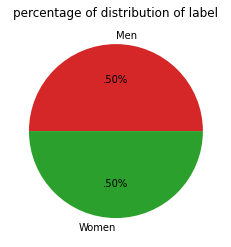

In [317]:
x=[1584,1584]
labels=['Men','Women']
colors=['tab:red','tab:green']
fig,ax=plt.subplots()
ax.pie(x,labels=labels,colors=colors,autopct='.%.0f%%')
ax.set_title('percentage of distribution of label')
plt.show()

In [318]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [319]:
from sklearn.preprocessing import LabelEncoder


In [320]:
lb=LabelEncoder()
df['label']=lb.fit_transform(df['label'])

In [321]:
df['label']
#male-1
#female-0

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int32

In [322]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3168, 20)
(3168,)


In [323]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [324]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

In [325]:
from sklearn.model_selection import  train_test_split

In [326]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

DecisionTreeClassifier

In [327]:
from sklearn.tree import DecisionTreeClassifier

In [328]:
m1=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=10)

In [329]:
m1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [330]:
print('Training Score',m1.score(x_train,y_train))
print('Test score',m1.score(x_test,y_test))

Training Score 0.994869771112865
Test score 0.9716088328075709


In [331]:
y_pred_m1=m1.predict(x_test)
print(y_pred_m1)

[0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1
 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1
 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1
 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 1 0 1 1 1 1 0 

In [332]:
from sklearn.metrics import classification_report,confusion_matrix

In [333]:
cm1=confusion_matrix(y_test,y_pred_m1)
print(cm1)
print(classification_report(y_test,y_pred_m1))

[[314   5]
 [ 13 302]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       319
           1       0.98      0.96      0.97       315

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



Random Forest Classifier

In [334]:
from sklearn.ensemble import RandomForestClassifier

In [335]:
m2=RandomForestClassifier(n_estimators=40,criterion='entropy',max_depth=10,min_samples_split=10)

In [336]:
m2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       n_estimators=40)

In [337]:
y_pred_m2=m2.predict(x_test)
print(y_pred_m2)

[0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 1 0 1 1 1 1 0 

In [338]:
print('Training Score',m2.score(x_train,y_train))
print('Test score',m2.score(x_test,y_test))

Training Score 0.9960536700868192
Test score 0.9842271293375394


In [339]:
cm2=confusion_matrix(y_test,y_pred_m2)
print(cm2)
print(classification_report(y_test,y_pred_m2))

[[315   4]
 [  6 309]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       319
           1       0.99      0.98      0.98       315

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [340]:
m2_b=RandomForestClassifier(n_estimators=40,criterion='gini',max_depth=10,min_samples_split=10)

In [341]:
m2_b.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=40)

In [342]:
y_pred_m2_b=m2_b.predict(x_test)
print(y_pred_m2_b)

[0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0
 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 1 0 1 1 1 1 0 

In [343]:
print('Training Score',m2_b.score(x_train,y_train))
print('Test score',m2_b.score(x_test,y_test))

Training Score 0.9932912391475928
Test score 0.9842271293375394


In [344]:
cm2_b=confusion_matrix(y_test,y_pred_m2)
print(cm2_b)
print(classification_report(y_test,y_pred_m2_b))

[[315   4]
 [  6 309]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       319
           1       0.99      0.98      0.98       315

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



KNN Classifier

In [345]:
from sklearn.neighbors import KNeighborsClassifier

In [346]:
m3=KNeighborsClassifier(n_neighbors=50)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [347]:
y_pred_m3=m3.predict(x_test)
print(y_pred_m3)

[0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1
 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1
 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0
 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 1 0 1 1 0 1 0 

In [348]:
print('Training Score',m3.score(x_train,y_train))
print('Test score',m3.score(x_test,y_test))

Training Score 0.6992896606156275
Test score 0.694006309148265


In [349]:
cm3=confusion_matrix(y_test,y_pred_m3)
print(cm3)
print(classification_report(y_test,y_pred_m3))

[[217 102]
 [ 92 223]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       319
           1       0.69      0.71      0.70       315

    accuracy                           0.69       634
   macro avg       0.69      0.69      0.69       634
weighted avg       0.69      0.69      0.69       634



Logistic Regression

In [350]:
from sklearn.linear_model import LogisticRegression

In [351]:
m4=LogisticRegression(solver='liblinear')

In [352]:
m4.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [353]:
y_pred_m4=m4.predict(x_test)
print(y_pred_m4)

[0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 1 0 1 1 1 1 0 

In [354]:
print('Training Score',m4.score(x_train,y_train))
print('Test score',m4.score(x_test,y_test))

Training Score 0.9116022099447514
Test score 0.9085173501577287


In [355]:
cm4=confusion_matrix(y_test,y_pred_m4)
print(cm4)
print(classification_report(y_test,y_pred_m4))

[[272  47]
 [ 11 304]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       319
           1       0.87      0.97      0.91       315

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634



SVM classifier

In [356]:
from sklearn.svm import SVC

LINEAR

In [357]:
m5=SVC(kernel='linear',C=1)

In [358]:
m5.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [359]:
y_pred_m5=m5.predict(x_test)
print(y_pred_m5)

[1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 1 0 1 1 1 1 0 

In [360]:
print('Training Score',m5.score(x_train,y_train))
print('Test score',m5.score(x_test,y_test))

Training Score 0.920678768745067
Test score 0.919558359621451


In [361]:
cm5=confusion_matrix(y_test,y_pred_m5)
print(cm5)
print(classification_report(y_test,y_pred_m5))

[[275  44]
 [  7 308]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       319
           1       0.88      0.98      0.92       315

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.93      0.92      0.92       634



RBF

In [362]:
m5_b=SVC(kernel='rbf',C=1,gamma=0.1)

In [363]:
m5_b.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [364]:
y_pred_m5_b=m5_b.predict(x_test)
print(y_pred_m5_b)

[0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1
 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0
 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1
 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1
 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 0 1 0 1 1 0 1 1 0 1 0 

In [365]:
print('Training Score',m5_b.score(x_train,y_train))
print('Test score',m5_b.score(x_test,y_test))

Training Score 0.7730860299921073
Test score 0.749211356466877


In [366]:
cm5_b=confusion_matrix(y_test,y_pred_m5_b)
print(cm5_b)
print(classification_report(y_test,y_pred_m5_b))

[[221  98]
 [ 61 254]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       319
           1       0.72      0.81      0.76       315

    accuracy                           0.75       634
   macro avg       0.75      0.75      0.75       634
weighted avg       0.75      0.75      0.75       634



POLY

In [367]:
m5_c=SVC(kernel='poly',C=1,degree=2)

In [368]:
m5_c.fit(x_train,y_train)

SVC(C=1, degree=2, kernel='poly')

In [369]:
y_pred_m5_c=m5_c.predict(x_test)
print(y_pred_m5_c)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [370]:
print('Training Score',m5_c.score(x_train,y_train))
print('Test score',m5_c.score(x_test,y_test))

Training Score 0.5142067876874507
Test score 0.5189274447949527


In [371]:
cm5_c=confusion_matrix(y_test,y_pred_m5_c)
print(cm5_c)
print(classification_report(y_test,y_pred_m5_c))

[[316   3]
 [302  13]]
              precision    recall  f1-score   support

           0       0.51      0.99      0.67       319
           1       0.81      0.04      0.08       315

    accuracy                           0.52       634
   macro avg       0.66      0.52      0.38       634
weighted avg       0.66      0.52      0.38       634



Random Forest Classifier is the most accurate with 98% accuracy